In [1]:
import sys
sys.path.insert(1,'E:\DUY\DS\deeplearning\PROJECTS\Custom_Tools')
import natural_language_processing_tools as nlp
import ultility_tools as utt

from time import time
import pandas as pd


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from nltk.tokenize.toktok import ToktokTokenizer
from gensim.models import Word2Vec

from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zacha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# 1/ Loading data

In [2]:
data = pd.read_csv("DATA/movie_reviews.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# 2/ Exploring/Preprocessing Data

## 2.1/ Quick plot that shows the count of each Score

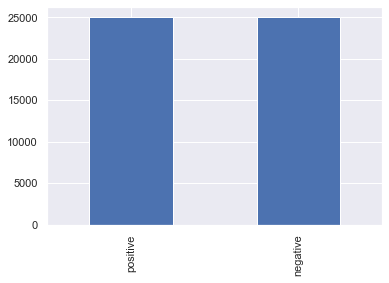

In [3]:
data.sentiment.value_counts().plot(kind="bar")

## 2.2/ Make training and testing sets

In [4]:
import numpy as np
X = np.array(data["review"])
X_train = X[:35000]
X_test = X[35000:]

y = np.array(data["sentiment"])
y_train = y[:35000]
y_test = y[35000:]

## 2.4/ Normalize texts in the training and testing sets

In [5]:
t0 = time()
X_train_norm = nlp.normalize_corpus(X_train)
X_test_norm = nlp.normalize_corpus(X_test)
print(time()- t0)
X_train_norm[:5]

1551.2494387626648


['one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinche scene violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy not high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would not dare forget pretty picture paint mainstream audience forget charm forget romance oz not mess around first episode ever see strike nasty surreal could not say ready watch develop taste oz get accustomed high level graphic violence not violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison

# 3/ Supervised Machine-Learning models: using TFIDF and LogisticRegression/SVM/Naive Bayes

## 3.1/ Get TFIDF features on the feature sets

In [6]:
tfidf = TfidfVectorizer(ngram_range=(1,2),sublinear_tf=True)
X_train_norm_tfidf = tfidf.fit_transform(X_train_norm)
X_test_norm_tfidf = tfidf.transform(X_test_norm)

## 3.2/ Using LogisticRegression modelb



Model Classification report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      7490
    positive       0.89      0.90      0.90      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:


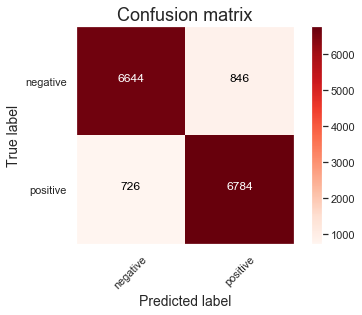

In [7]:
# initialize the classifier
lr = LogisticRegression()

# train the model and get the predicted labels for the testing set
y_pred = utt.train_predict_model(lr, X_train_norm_tfidf, y_train, X_test_norm_tfidf)

# get evaluation of performance of the model
cm = utt.display_model_performance_metrics(y_test, y_pred, lr.classes_)


## 3.3/ Using Support Vector Machine (SVM) model


Model Classification report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      7490
    positive       0.88      0.92      0.90      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:


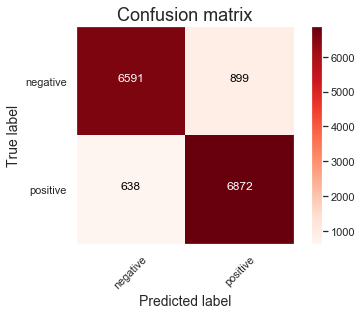

In [8]:
# initialize the classifier
svm = SGDClassifier()

# train the model and get the predicted labels for the testing set
y_pred = utt.train_predict_model(svm, X_train_norm_tfidf, y_train, X_test_norm_tfidf)

# get evaluation of performance of the model
cm_svm = utt.display_model_performance_metrics(y_test, y_pred, svm.classes_)

## 3.4/ Using Naive Bayes model


Model Classification report:
              precision    recall  f1-score   support

    negative       0.87      0.91      0.89      7490
    positive       0.91      0.86      0.89      7510

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000


Prediction Confusion Matrix:


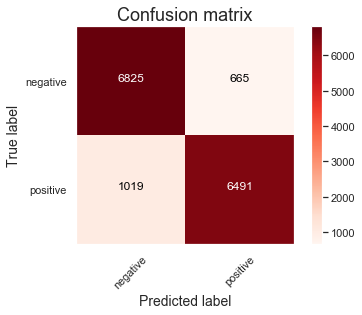

In [9]:
# initialize the classifier
nb = MultinomialNB()

# train the model and get the predicted labels for the testing set
y_pred = utt.train_predict_model(nb, X_train_norm_tfidf, y_train, X_test_norm_tfidf)

# get evaluation of performance of the model
cm_nb = utt.display_model_performance_metrics(y_test, y_pred, nb.classes_)


# 4/ Supervised Deep-Learning model, using Word2Vec and Deep Neural Network

## 4.1/ Get Word2Vec features on the feature sets

In [10]:
# tokenize the training set and testing set
tokenizer = ToktokTokenizer()
X_train_norm_tokenized = [tokenizer.tokenize(text) for text in X_train_norm]
X_test_norm_tokenized = [tokenizer.tokenize(text) for text in X_test_norm]

In [11]:
# build word2vec model
w2v_num_features = 500
w2v_model = Word2Vec(X_train_norm_tokenized, size=w2v_num_features, window=150, min_count=10)


In [12]:
# generate averaged word vector features from word2vec model
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)

    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.

        for word in words:
            if word in vocabulary:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

X_train_wv = averaged_word2vec_vectorizer(X_train_norm_tokenized, w2v_model,w2v_num_features)
X_test_wv = averaged_word2vec_vectorizer(X_test_norm_tokenized, w2v_model,w2v_num_features)

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [19]:
X_train_wv.shape

(35000, 500)

## 4.2/ Get Class label Encoding

In [13]:
from keras.utils import to_categorical
le = LabelEncoder()
num_classes = 2
y_train_encoded = le.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_encoded,num_classes)

y_test_encoded = le.fit_transform(y_test)
y_test_encoded = to_categorical(y_test_encoded,num_classes)

In [18]:
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))

Sentiment class label map: {'negative': 0, 'positive': 1}


## 4.3/ Using DNN


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               256512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

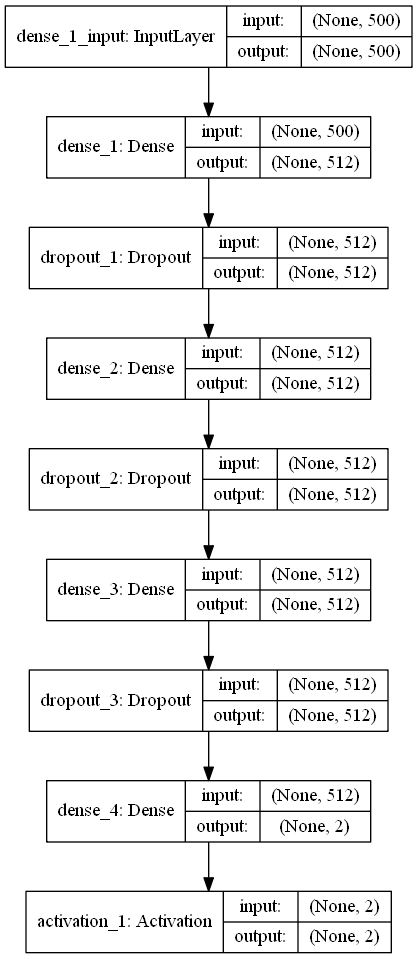

In [14]:
# building the DDN model
from keras.utils import plot_model
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',
                      metrics=['accuracy'])

    print(dnn_model.summary())
    display(plot_model(dnn_model, show_shapes=True))

    return dnn_model

dnn_w2v = construct_deepnn_architecture(num_input_features=500)

In [15]:
# training the model
dnn_w2v.fit(X_train_wv,y_train_encoded,epochs=5,batch_size=100,shuffle=True,validation_split=0.1,verbose=1)


Train on 31500 samples, validate on 3500 samples
Epoch 1/5
31500/31500 [==============================] - 3s 89us/step - loss: 0.3092 - accuracy: 0.8682 - val_loss: 0.3137 - val_accuracy: 0.8634

In [16]:
y_pred_encoded = dnn_w2v.predict_classes(X_test_wv)
y_pred = le.inverse_transform((y_pred_encoded))


Model Classification report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      7490
    positive       0.88      0.89      0.88      7510

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000


Prediction Confusion Matrix:


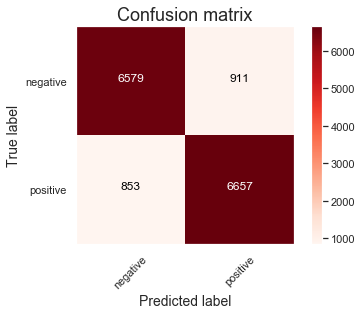

In [20]:
# get evaluation of performance of the model
cm_nb = utt.display_model_performance_metrics(y_test, y_pred, lr.classes_)

# 5/ Supervised Deep-Learning model, using Glove and Deep Neural Network

## 5.1/ Get Glove features on the feature sets

In [21]:
import spacy
# tokenize the training set and testing set
nlp = spacy.load('en', parse=False, tag=False, entity=False)
X_train_nlp = [nlp(text) for text in X_train_norm]
X_test_nlp = [nlp(text) for text in X_test_norm]

X_train_nlp = np.array([item.vector for item in X_train_nlp])
X_test_nlp = np.array([item.vector for item in X_test_nlp])
print(X_train_nlp.shape)

(35000, 96)


In [22]:
X_test_nlp.shape[1]

96

## 5.2/ Using DNN


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               49664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

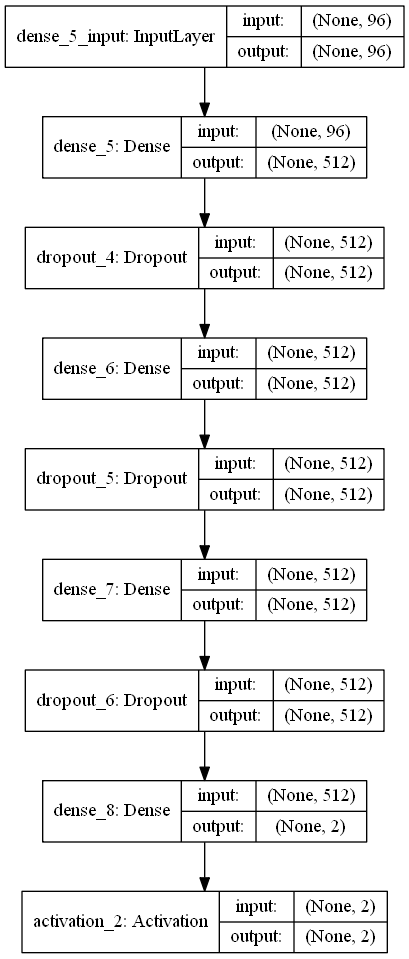

In [23]:
# building the DDN model
num_input_features = X_train_nlp.shape[1]
dnn_nlp = construct_deepnn_architecture(num_input_features=num_input_features)

In [24]:
# training the model
dnn_nlp.fit(X_train_nlp,y_train_encoded,epochs=5,batch_size=100,shuffle=True,validation_split=0.1,verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5
31500/31500 [==============================] - 3s 80us/step - loss: 0.6457 - accuracy: 0.6296 - val_loss: 0.6256 - val_accuracy: 0.6680

In [25]:
y_pred_encoded = dnn_nlp.predict_classes(X_test_nlp)
y_pred = le.inverse_transform((y_pred_encoded))


Model Classification report:
              precision    recall  f1-score   support

    negative       0.69      0.63      0.66      7490
    positive       0.66      0.72      0.69      7510

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000


Prediction Confusion Matrix:


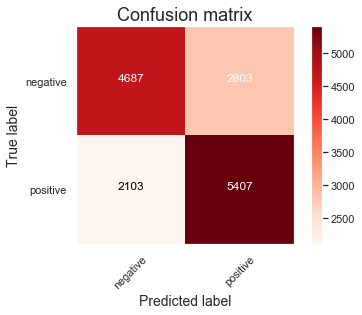

In [27]:
# get evaluation of performance of the model
cm_nb = utt.display_model_performance_metrics(y_test, y_pred, lr.classes_)